This file is about the Support Vector Machines(SVMs)
- validation
- scale and transform
- exploring the C value
- an accurecy score
- confusion matrix and a report

Until the line, above **model**, code are the same for all 4 files for models

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#from 2.1_0_models_quick.ipynb
%store -r df_models_valid

In [25]:
#make a new datafram by coping <df2_dammy>
df_valid = df_models_valid.copy()
print(df_valid.shape)
df_valid.head(2)

(46090, 652)


,Arrest,Domestic,Crimes Against,beat_no,Location Description_AIRCRAFT,Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,Location Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,Location Description_AIRPORT EXTERIOR - NON-SECURE AREA,Location Description_AIRPORT EXTERIOR - SECURE AREA,Location Description_AIRPORT PARKING LOT,...,Community Area_72.0,Community Area_73.0,Community Area_74.0,Community Area_75.0,Community Area_76.0,Community Area_77.0,Year,Month,Day,Hour
3210128,1,1,Persons,12,0,0,0,0,0,0,...,0,0,0,0,0,0,2003,8,15,22
2571066,1,0,Society,15,0,0,0,0,0,0,...,0,0,0,0,0,0,2011,10,6,0


##### validation

In [26]:
#target
y2 = pd.factorize(df_valid['Crimes Against'])[0]
# Convert Categorical Attributes to Numerical
#https://www.kaggle.com/code/heng8835/classification-with-ml-predict-crime-type

#features
X2 = df_valid.drop(columns='Crimes Against')

In [27]:
y2

array([0, 1, 2, ..., 0, 2, 0], dtype=int64)

In [28]:
crimesAgainst = pd.DataFrame({'y2': y2})
crimesAgainst.head()

,y2
0,0
1,1
2,2
3,0
4,0


<Figure size 640x480 with 0 Axes>

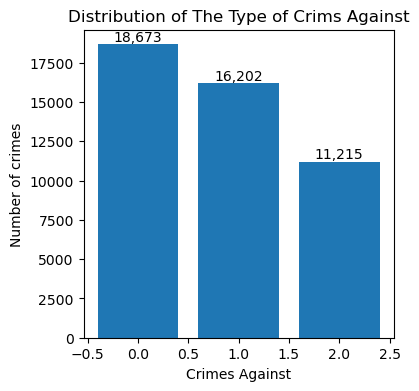

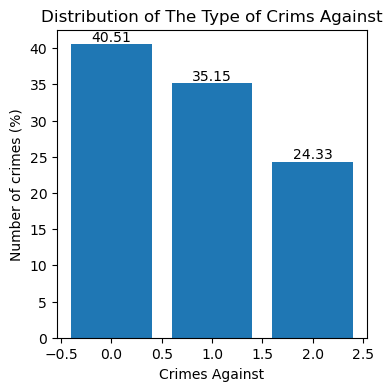

In [29]:
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html

#
crimes_Against = crimesAgainst['y2'].value_counts()
percent = crimes_Against/crimesAgainst.shape[0]*100

#plot with bar
plt.figure()

#numbers
crims = list(crimes_Against.index)
counts = list(crimes_Against.values)

fig, ax = plt.subplots(figsize = (4,4))
bar_container = ax.bar(crims, counts)
ax.set(xlabel='Crimes Against', ylabel='Number of crimes', title='Distribution of The Type of Crims Against')
ax.bar_label(bar_container, fmt='{:,.0f}')


#percentages
fig, ax = plt.subplots(figsize = (4,4))
bar_container = ax.bar(list(percent.index), list(percent.values))
ax.set(xlabel='Crimes Against', ylabel='Number of crimes (%)', title='Distribution of The Type of Crims Against')
ax.bar_label(bar_container, fmt='{:0.2f}')

plt.show()

x-axis: 0.0, 1.0, 2.0 in the graphes above --> 'Person', 'Society', 'Property'

In [30]:
# Taking a chunk for the 20% test set
X2_remainder, X2_test, y2_remainder, y2_test = train_test_split(
                                        X2, y2, test_size = 0.2, stratify=y2, random_state=1)

- `X_remainder` and `y_remainder`: $80$%
- `X_test` and `y_test`: $20$%

In [31]:
#y2_remainder
y2_remainder

array([1, 2, 2, ..., 2, 1, 2], dtype=int64)

In [32]:
#make a dataframe for 'y2_remainder'
y_df = pd.DataFrame(y2_remainder)
y_df.head()

,0
0,1
1,2
2,2
3,0
4,1


In [33]:
# #
# crimes_Against = y_df.value_counts()
# percent = crimes_Against/crimesAgainst.shape[0]*100

# #plot with bar
# plt.figure()

# #numbers
# crims = list(crimes_Against.index)
# counts = list(crimes_Against.values)

# fig, ax = plt.subplots(figsize = (4,4))
# bar_container = ax.bar(crims, counts)
# ax.set(xlabel='Crimes Against', ylabel='Number of crimes', title='Distribution of The Type of Crims Against')
# ax.bar_label(bar_container, fmt='{:,.0f}')


# #percentages
# fig, ax = plt.subplots(figsize = (4,4))
# bar_container = ax.bar(list(percent.index), list(percent.values))
# ax.set(xlabel='Crimes Against', ylabel='Number of crimes (%)', title='Distribution of The Type of Crims Against')
# ax.bar_label(bar_container, fmt='{:0.2f}')

# plt.show()

### get an error but no time to check. skip this part. assume the destributios are the same

In [34]:
# Splitting the remainder in two chunks
X2_train, X2_valid, y2_train, y2_valid = train_test_split(
                        X2_remainder, y2_remainder, test_size = 0.3, stratify=y2_remainder, random_state=1)

from the remainder set:
- `X_train` and `y_train`: $70$% ( $56$% = $80$ * $70$ )
- `X_valid` and `y_valid`: $30$% ( $24$% = $80$ * $30$ )

In [35]:
#expected size
print(f'Expected sizes: train({46090*0.56}), validation({46090*0.24}), \ttest({46090*0.2})')
#actual size
print(f'Actual sizes: \ttrain({X2_train.shape[0]}), \tvalidation({X2_valid.shape[0]}), \ttest({X2_test.shape[0]})')

Expected sizes: train(25810.4), validation(11061.6), 	test(9218.0)
Actual sizes: 	train(25810), 	validation(11062), 	test(9218)


In [36]:
X2_train.shape

(25810, 651)

---

#### model

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
#scale
scaler = StandardScaler()
scaler.fit(X2_train)
#transform
X2_train_sc = scaler.transform(X2_train)
X2_validation_sc = scaler.transform(X2_valid)
X2_test_sc = scaler.transform(X2_test)

In [39]:
validation_scores = []
train_scores = []

# C_range = np.array([.00000001,.0000001,.000001,.00001,.0001,.001,0.1,\
#                 1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000])

C_range = []
for i in range(-8, 5):
    C_range.append(10**i)

for c in C_range:
    logreg = LinearSVC(C = c,random_state=1)
    logreg.fit(X2_train_sc,y2_train)
    
    # train on traning set
    train_scores.append(logreg.score(X2_train_sc,y2_train))
    # score on validation set
    validation_scores.append(logreg.score(X2_validation_sc,y2_valid))

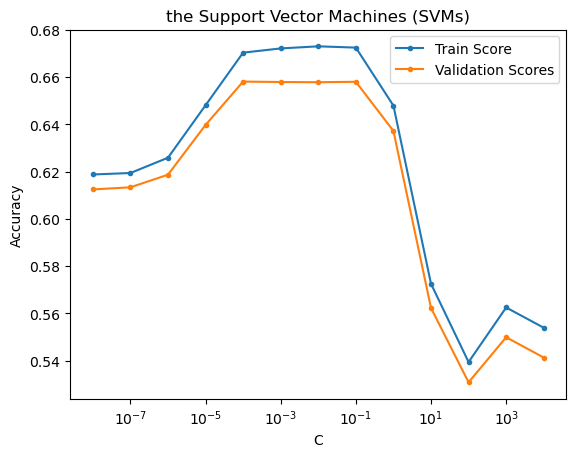

In [40]:
#visualize the scores
plt.figure()
plt.plot(C_range, train_scores,label="Train Score",marker='.')
plt.plot(C_range, validation_scores,label="Validation Scores",marker='.')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('the Support Vector Machines (SVMs)')
plt.legend()
plt.show()

In [41]:
final_model = LogisticRegression(C=10**-4,random_state=1)

final_model.fit(X2_train_sc, y2_train)
print(f'{final_model.score(X2_test_sc,y2_test):0.3f}')

0.630


,Predicted Person (0),Predicted Society (1),Predicted Property (2)
Person,2876,624,235
Society,871,2184,185
Property,1211,281,751


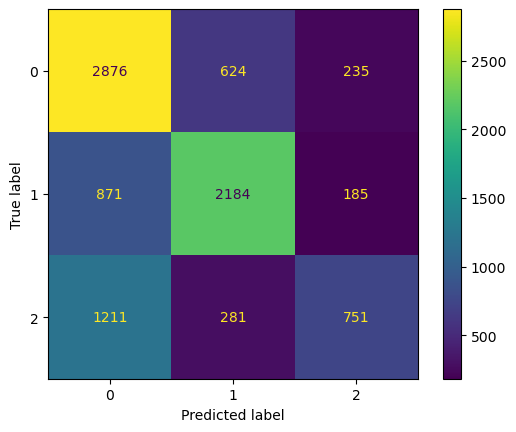

In [42]:

# Get class predictions
y_pred = final_model.predict(X2_test_sc)

# Generate confusion matrix
cf_matrix = confusion_matrix(y2_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix,
    columns=['Predicted Person (0)', 'Predicted Society (1)', 'Predicted Property (2)'],
        index=['Person', 'Society', 'Property']
)

display(cf_df)

# the function expects the estimator, inputs and target as parameters
ConfusionMatrixDisplay.from_estimator(final_model, X2_test_sc, y2_test)

Correct Predicttions:
- 2876 for Crimes Agains Person (0)
- 2184 for Crimes Against Society (1)
- 751 for Crimes Against Property (2)

Wrong Predictions
- 871 predicted as 0 instead of 1
- 1211 predicted as 0 instead of 2
- 624 predicted as 1 instead of 0
- 281 predicted as 1 instead of 2
- 235 predicted as 2 instead of 0
- 185 predicted as 2 instead of 1

In [43]:
from sklearn.metrics import classification_report

report_initial = classification_report(y2_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.58      0.77      0.66      3735
           1       0.71      0.67      0.69      3240
           2       0.64      0.33      0.44      2243

    accuracy                           0.63      9218
   macro avg       0.64      0.59      0.60      9218
weighted avg       0.64      0.63      0.62      9218



Precision: how many of them are correctly predicted in the predicted group.
recall: how many of them are correctly predictted in the group

Crimes Agains Person (0):
- 58% is 0 and 42% is 1 or 2 in the predicted group 0 
- 77% is 0 in the predicted group 0 and 23% is 0 in the defferent group: 1 or 2

Crimes Against Society (1):
- 71% is 1 and 29% is 0 or 2 in the predicted group 1 
- 67% is 1 in the predicted group 1 and 33% is 1 in the defferent group: 0 or 2

Crimes Against Property (2):
- 64% is 2 and 36% is 0 or 1 in the predicted group 2
- 33% is 2 in the predicted group 2 and 67% is 2 in the defferent group: 0 or 1